# HABERMANS DATASET ASSIGNMENT

Description of dataset-:
1. AGE - Age of patient
2. YOP - Year of operation
3. POS_NODES - No. of positive auxillary nodes found
4. STATUS-:
    1= Patient survived for 5 or more years,
    2= Patient died within 5 years.

In [3]:
import pandas as p
x=['AGE','YOP','POS_NODES','STATUS']
a=p.read_csv('haberman.csv',names=x)
print(a.head())

   AGE  YOP  POS_NODES  STATUS
0   30   64          1       1
1   30   62          3       1
2   30   65          0       1
3   31   59          2       1
4   31   65          4       1


In [7]:
print(a.shape)

(306, 4)


-> There are 306 datapoints and 4 features.

In [8]:
print(a.columns)

Index(['AGE', 'YOP', 'POS_NODES', 'STATUS'], dtype='object')


-> These are the column name in the dataset.

In [9]:
print(a['STATUS'].value_counts())

1    225
2     81
Name: STATUS, dtype: int64


1. There are 2 classes:'1' and '2'.
2. Datapoints present for class '1' : 225
3. Datapoints present for class '2' : 81

# OBSERVATION

1. The dataset is classified into two classes i.e 225 patients of class 1, those who survived for more than 5 years,81 patients of class 2, those who not survived for more than 5 years.
2. This dataset is an imbalanced dataset as there is huge margin between the datapoints of class-1 and class-2.

# OBJECTIVE

Given a persons age,positive nodes and year of operation we have to find whether that person lies in class-1 or class-2.

# 2-D SCATTER PLOT

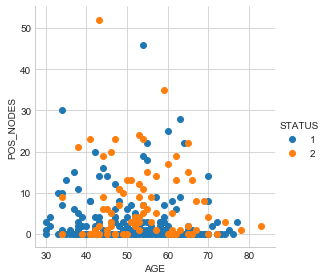

In [14]:
import seaborn as sea
import matplotlib.pyplot as plt
sea.set_style("whitegrid")
sea.FacetGrid(a,hue="STATUS",size=4) \
   .map(plt.scatter,'AGE','POS_NODES') \
   .add_legend()
plt.show()

OBSERVATIONS-:

1. Using age and no. of positive axillary nodes as features, we cannot make any difference since both are overlapping each other.
2. Most of the people have 0 positive auxillary node.

# PAIR-PLOT

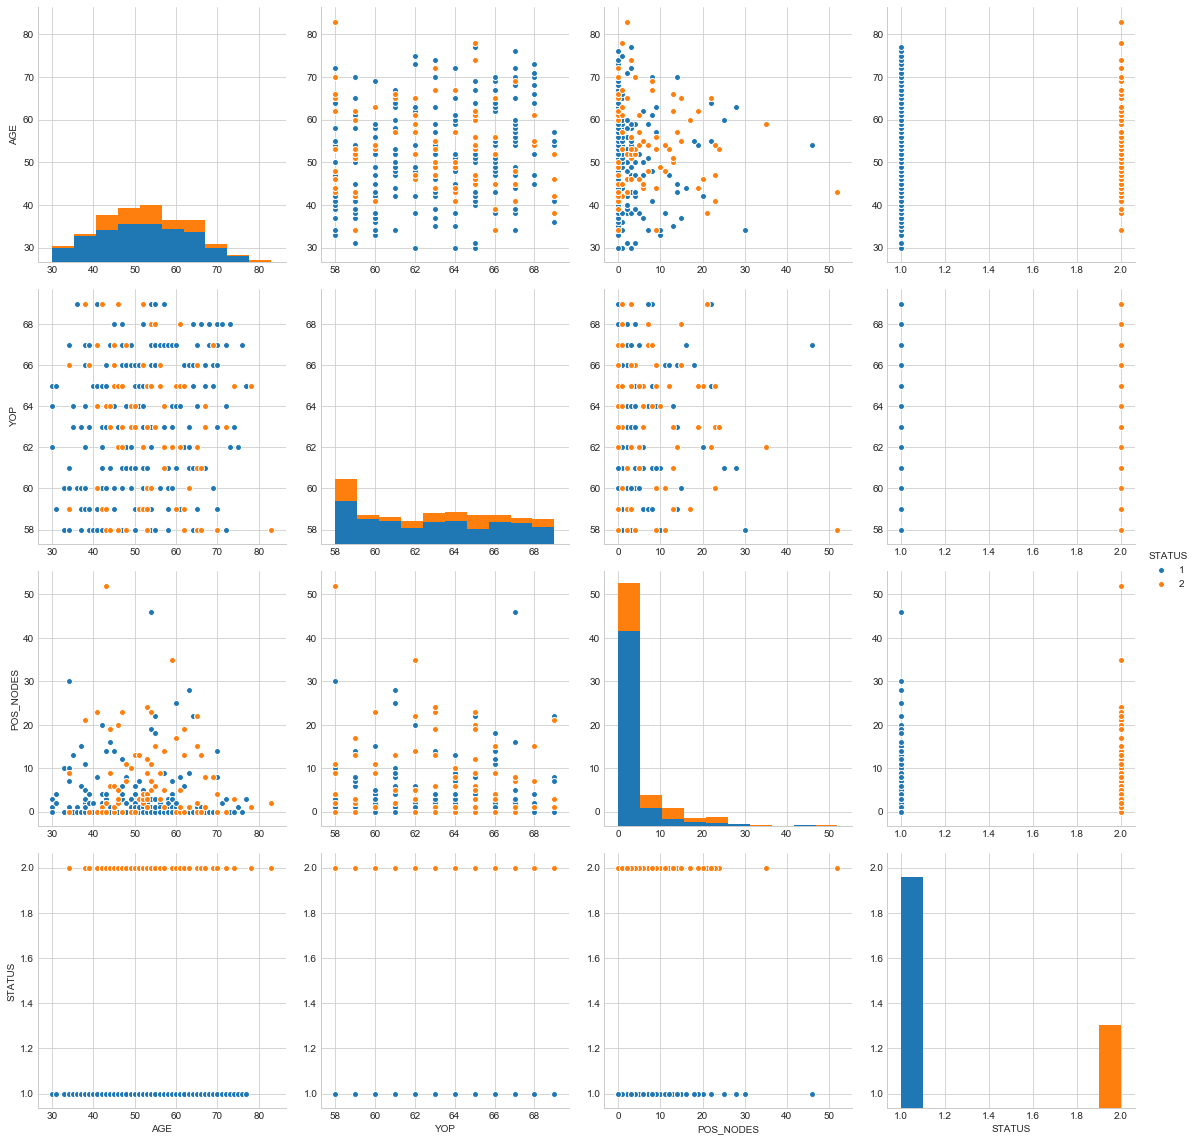

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
x=['AGE','YOP','POS_NODES','STATUS']
a=pd.read_csv("haberman.csv",names=x)
sea.set_style("whitegrid")
sea.pairplot(a,hue="STATUS",size=4)
plt.show()

OBSERVATION-:

1. There are no two features through which we can easily distinguish between class-1 and class-2.

# HISTOGRAM AND PDF

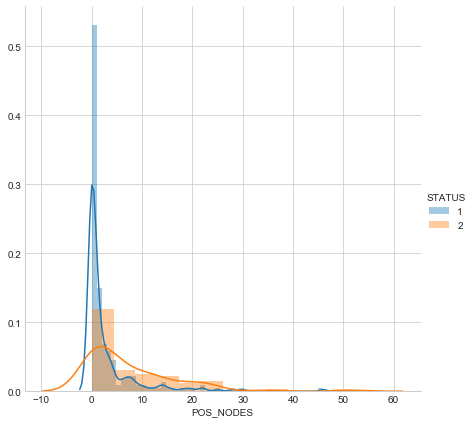

In [25]:
sea.FacetGrid(a,hue='STATUS',size=6) \
    .map(sea.distplot,'POS_NODES') \
    .add_legend()
plt.show()

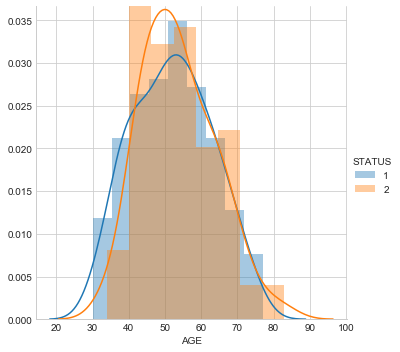

In [26]:
sea.FacetGrid(a,hue='STATUS',size=5) \
    .map(sea.distplot,'AGE') \
    .add_legend()
plt.show()


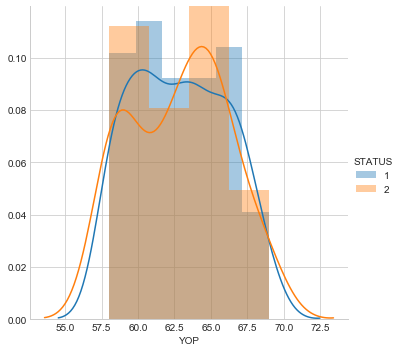

In [27]:
sea.FacetGrid(a,hue='STATUS',size=5) \
    .map(sea.distplot,'YOP') \
    .add_legend()
plt.show()

As the distribution for class-1 and class-2 overlaps in huge amount, so we will go for the mean.

In [43]:
import numpy as np
a1= a.loc[a['STATUS']==1];
a2= a.loc[a["STATUS"]==2];
print("MEANS-:")
print(".FOR AGE")
print(round(np.mean(a1["AGE"])))
print(round(np.mean(a2["AGE"])))
print("---------------")
print(".FOR POS_NODES")
print(round(np.mean(a1["POS_NODES"])))
print(round(np.mean(a2["POS_NODES"])))
print("---------------")
print(".FOR YOP")
print(round(np.mean(a1["YOP"])))
print(round(np.mean(a1["YOP"])))

MEANS-:
.FOR AGE
52
54
---------------
.FOR POS_NODES
3
7
---------------
.FOR YOP
63
63


OBSERVATION-:

1. Of the three features POS_NODES is a very important feature in identifying the class as the difference between the means are more as compared to others.

2. Most of the people that have 0 POS_NODES have survived.
3. The mean positive auxillary nodes for the person that survived are 3 as compared to 7 which have not survived.
4. The mean age of the patients which survived is 52 years and not survived is 54 years.

# CDF

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


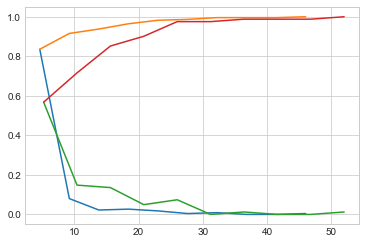

In [75]:
counts, bin_edges = np.histogram(a1['POS_NODES'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
#plt.show()
counts, bin_edges = np.histogram(a2['POS_NODES'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

OBSERVATION-:

1. If the positive auxillary nodes are more than 46 then the person definately comes under the class-2.
2. If the no. of positive auxillary nodes lies between 0-24 then there are 82%-98% chances of survival whereas the non-survival ranges from 59% to 84%. 

# STATISTICAL DESCRIPTION

In [76]:
a1.describe()

,AGE,YOP,POS_NODES,STATUS
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [77]:
a2.describe()

,AGE,YOP,POS_NODES,STATUS
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# BOX PLOT

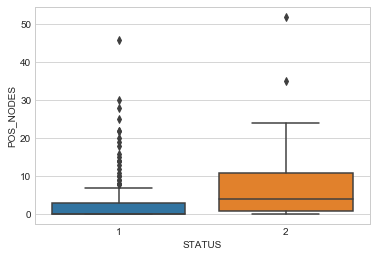

In [81]:
sea.boxplot(y='POS_NODES',x='STATUS',data=a)
plt.show()

# VIOLIN PLOT

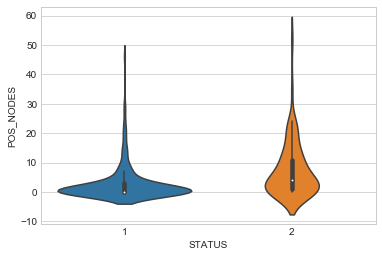

In [82]:
sea.violinplot(x='STATUS',y='POS_NODES',data=a,size=8)
plt.show()

OBSERVATION-:

1. The Plots tells us that 50% of points in class-2 are having auxillary nodes less than 5.
2. 75% of points in class-1 are having auxillary nodes less than 5.
3. The plot also tells us that if the value of positive auxillary nodes are greater than 7 then the patient will not survive.